In [5]:
#Standard libs
import numpy as np 
import pandas as pd 

#Data Visualisation libs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import missingno as msno

In [6]:
abalone_years = pd.read_csv(r'C:\Users\user\Downloads\abalone1/abalone.csv')

In [7]:
abalone_years .head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
abalone_years .tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [9]:
abalone_years .describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
abalone_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
abalone_years.shape

(4177, 9)

In [13]:
len(abalone_years.isnull())

4177

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='Rings'>

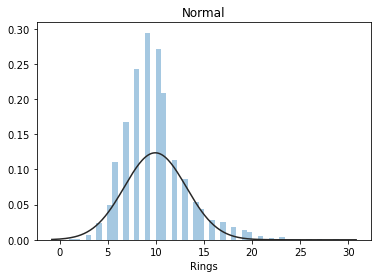

In [14]:
#Data Visuallisation
r = abalone_years['Rings']
plt.figure(1);plt.title('Normal')
sns.distplot(r,kde=False,fit=st.norm)

Text(0, 0.5, 'count')

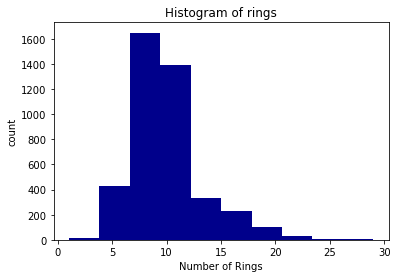

In [15]:
plt.hist(r,color='darkblue')
plt.title('Histogram of rings')
plt.xlabel('Number of Rings')
plt.ylabel('count')

In [16]:
count_features = abalone_years.select_dtypes(include=[np.number])
co_relation= count_features.corr()

In [17]:
print(co_relation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


<AxesSubplot:title={'center':'Correlation of numeric features'}>

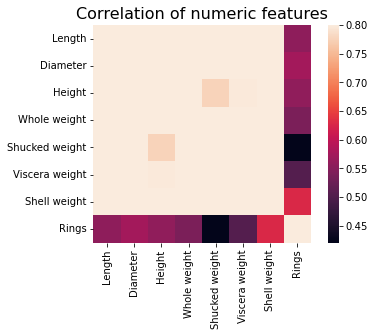

In [18]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(co_relation,square=True,vmax=0.8)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


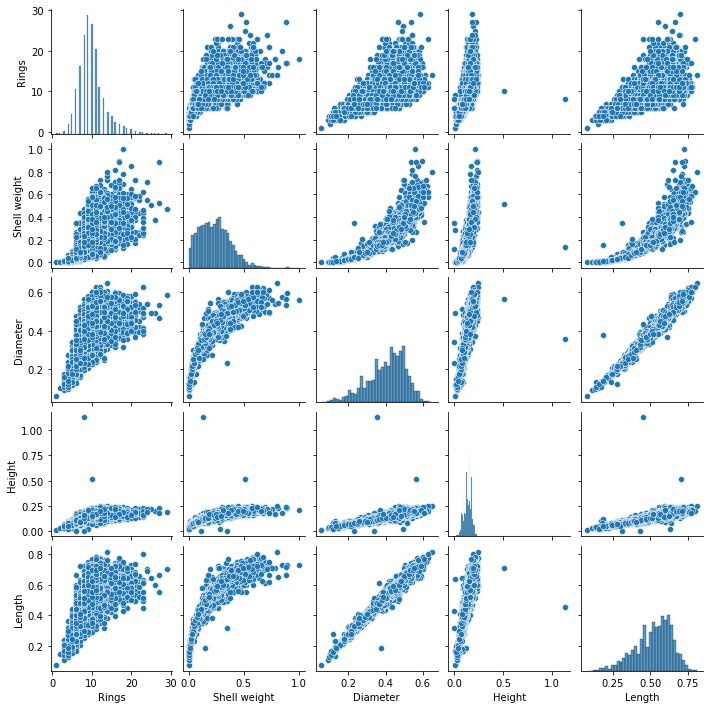

In [22]:
column_data= ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone_years[column_data],size=2,kind='scatter')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender count of Abalone')

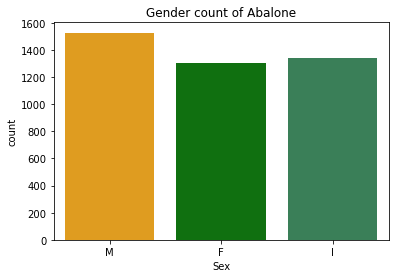

In [23]:
import matplotlib.pyplot as plt
palette1= {"green","orange","seagreen"}
sns.countplot(abalone_age['Sex'],palette=palette1)
#sns.color_palette("bright")
plt.title('Gender count of Abalone')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution Rings')

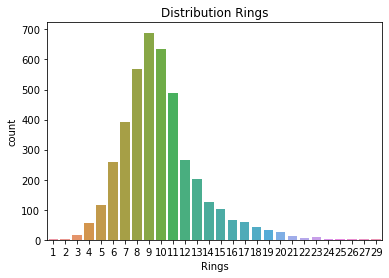

In [24]:
sns.countplot(abalone_years['Rings'])
plt.title('Distribution Rings')

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

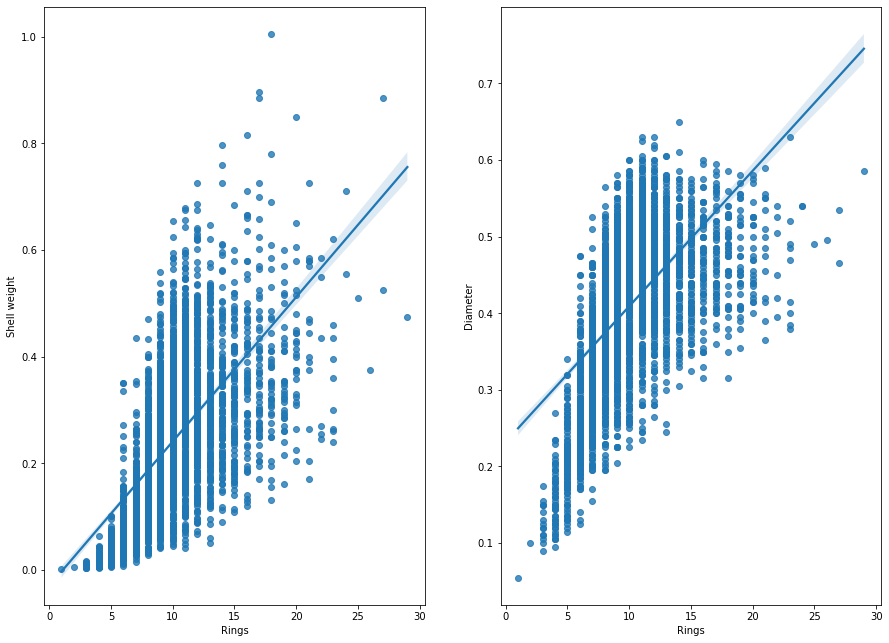

In [25]:
fig,(ax_is1,ax_is2) = plt.subplots(nrows=1,ncols=2,figsize=(15,11))

Shells_plot = pd.concat([abalone_years['Rings'],abalone_years['Shell weight']],axis=1)
sns.regplot(x='Rings',y='Shell weight',data=Shells_plot,scatter=True,fit_reg=True,ax=ax_is1)

Dimtr_plt = pd.concat([abalone_years['Rings'],abalone_years['Diameter']],axis=1)
sns.regplot(x='Rings',y='Diameter',data=Dimtr_plt,scatter=True,fit_reg=True,ax=ax_is2)

In [26]:
#Data Cleaning
from scipy import stats
data_preporocess= np.abs(stats.zscore(abalone_years.select_dtypes(include=[np.number])))
print(data_preporocess)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.726212      0.638217  1.571544  
1           1.205221      1.212987  0.910013  
2           0.356690      0.207139  0.2896

In [27]:
abln_0 = abalone_years[(data_preporocess< 3).all(axis=1)]

In [28]:
print("Abalones shape with outliers: "+ str(abalone_years.shape) , 
      "Abalones shape without outliers: " + str(abln_0.shape))

Abalones shape with outliers: (4177, 9) Abalones shape without outliers: (4027, 9)


In [29]:
#Feature Engineering
low_col = [cname for cname in abln_0.columns if
                        abln_0[cname].nunique() < 10 and 
                       abln_0[cname].dtype == "object"]
numeric_cl= [cname for cname in abln_0.columns if
                                 abln_0[cname].dtype in ['int64','float64']]

m1_col= low_col + numeric_cl
abln_predits= abln_0[m1_col]

In [30]:
abln_predits.dtypes.sample(7)

Rings               int64
Shell weight      float64
Diameter          float64
Height            float64
Viscera weight    float64
Length            float64
Sex                object
dtype: object

In [31]:
abln_encod_predict = pd.get_dummies(abln_predits)

In [32]:
abln_encod_predict.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [33]:
abln_encod_predict.shape

(4027, 11)

In [35]:
#Train Modles
abln_encod_predict['age'] = abln_encod_predict['Rings']+1.5
abln_encod_predict.drop('Rings', axis = 1, inplace = True)


In [36]:
abln_age = []
for i in abln_encod_predict['age']:
  if i > 11.12:
    abln_age.append('1')
  else:
    abln_age.append('0')
abln_encod_predict['Age'] = abln_age
abln_encod_predict.drop('age', axis = 1, inplace = True)
abln_encod_predict.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,0


In [37]:
abln_encod_predict['Age'].value_counts()

0    2073
1    1954
Name: Age, dtype: int64

In [39]:
X_abn= abln_encod_predict.drop('Age', axis = 1).values
Y_abn= abln_encod_predict['Age'].values

In [40]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(X_abn, Y_abn, test_size = 0.3, random_state = 123)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)

In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
decision_tr = DecisionTreeClassifier(max_depth = 5)
decision_tr.fit(X_trn, y_trn)
y_pred = decision_tr.predict(X_tst)
print('Classification Report: \n', classification_report(y_tst, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_tst, y_pred))
decision_tree_trn_acc = decision_tr.score(X_trn, y_trn)
print('Training Score: ', decision_tree_trn_acc)
dec_tree_tst_acc = decision_tr.score(X_tst, y_tst)
print('Testing Score: ', dec_tree_tst_acc )

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       616
           1       0.72      0.74      0.73       593

    accuracy                           0.73      1209
   macro avg       0.73      0.73      0.73      1209
weighted avg       0.73      0.73      0.73      1209

Confusion Matrix: 
 [[447 169]
 [156 437]]
Training Score:  0.8055358410220014
Testing Score:  0.7311827956989247


In [56]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrx = confusion_matrix(y_tst, y_pred)

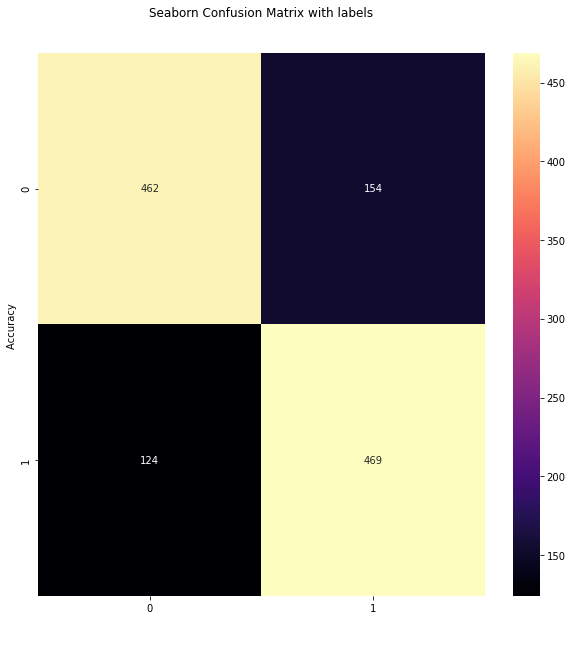

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrx, annot=True, cmap='magma',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\n ')
ax.set_ylabel('Accuracy ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
randm_frst = RandomForestClassifier(n_estimators= 150, max_depth= 5)
randm_frst.fit(X_trn, y_trn)
y_pred = randm_frst.predict(X_tst)
print('Classification Report: \n', classification_report(y_tst, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_tst, y_pred))
randm_frst_train_acc = randm_frst.score(X_trn, y_trn)
print('Training Score: ', randm_frst_train_acc)
randm_frst_test_acc = randm_frst.score(X_tst, y_tst)
print('Testing Score: ', randm_frst_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.76       616
           1       0.74      0.80      0.77       593

    accuracy                           0.76      1209
   macro avg       0.76      0.76      0.76      1209
weighted avg       0.76      0.76      0.76      1209

Confusion Matrix: 
 [[445 171]
 [117 476]]
Training Score:  0.8200851667849539
Testing Score:  0.7617866004962779


In [50]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix2 = confusion_matrix(y_tst, y_pred)

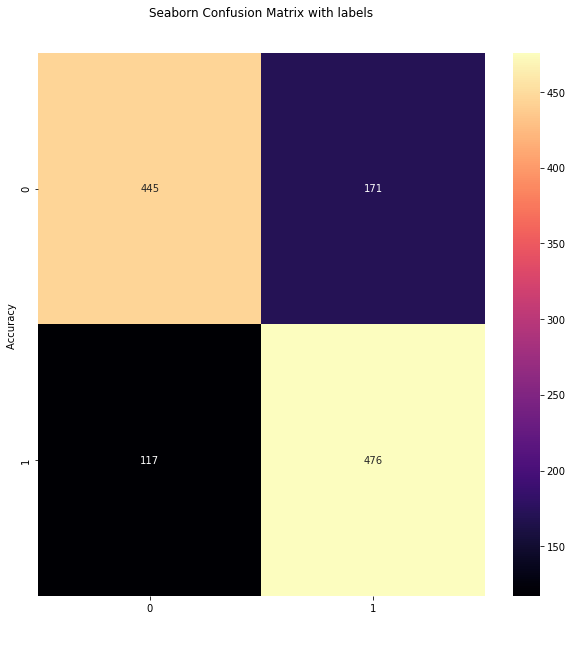

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
axs = sns.heatmap(cf_matrix2, annot=True, cmap='magma',fmt="d")

axs.set_title('Seaborn Confusion Matrix with labels\n\n');
axs.set_xlabel('\n ')
axs.set_ylabel('Accuracy ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(["Decision Tree Performance"])
## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = "binary:logistic", n_estimators = 100, max_depth = 3,subsample = 0.8, colsample_bytree = 0.6, learning_rate = 0.1)
xgb.fit(X_trn, y_trn)
y_pred = xgb.predict(X_tst)
print('Classification Report: \n', classification_report(y_tst, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_tst, y_pred))
xgb_trn_acc = xgb.score(X_trn, y_trn)
print('Training Score: ', xgb_trn_acc)
xgb_tst_acc = xgb.score(X_tst, y_tst)
print('Testing Score: ', xgb_tst_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       616
           1       0.75      0.79      0.77       593

    accuracy                           0.77      1209
   macro avg       0.77      0.77      0.77      1209
weighted avg       0.77      0.77      0.77      1209

Confusion Matrix: 
 [[462 154]
 [124 469]]
Training Score:  0.8317955997161107
Testing Score:  0.7700578990901572


In [53]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_tst, y_pred)

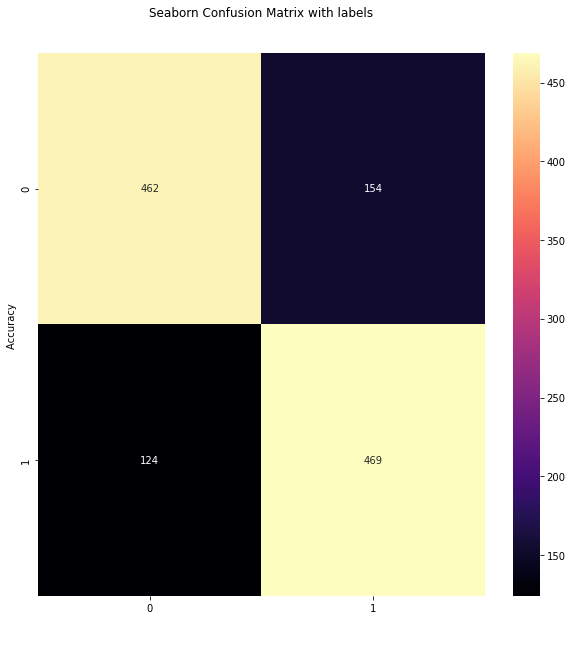

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
axs= sns.heatmap(cf_matrix, annot=True, cmap='magma',fmt="d")

axs.set_title('Seaborn Confusion Matrix with labels\n\n');
axs.set_xlabel('\n ')
axs.set_ylabel('Accuracy ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(["XGBoost Performance"])
## Display the visualization of the Confusion Matrix.
plt.show()